## Historical Data
- timeseries

## Categorising Stocks into Over-valued / Under-Valued

- Using CAPM

**Taken from :** https://github.com/jayashree8/Finance_Trading_In_Python/blob/main/CAPM/CAPM.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm
from scipy import stats
import pandas as pd
import pandas_datareader as web 
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data
from matplotlib.ticker import FuncFormatter
from pandas.plotting import scatter_matrix

In [2]:
tickers = ['AAPL', 'SPY']

start_date = '2012-01-01'
end_date = '2022-01-01'

panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [3]:
panel_data

Attributes   Adj Close                   Close                    High  \
Symbols           AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2012-01-03   12.575913  105.276878   14.686786  127.500000   14.732143   
2012-01-04   12.643500  105.442009   14.765714  127.699997   14.810000   
2012-01-05   12.783869  105.722733   14.929643  128.039993   14.948214   
2012-01-06   12.917507  105.450272   15.085714  127.709999   15.098214   
2012-01-09   12.897018  105.706223   15.061786  128.020004   15.276786   
...                ...         ...         ...         ...         ...   
2021-12-27  180.100540  477.260010  180.330002  477.260010  180.419998   
2021-12-28  179.061859  476.869995  179.289993  476.869995  181.330002   
2021-12-29  179.151749  477.480011  179.380005  477.480011  180.630005   
2021-12-30  177.973251  476.160004  178.199997  476.160004  180.570007   
2021-12-31  177.344055  474.959991  177.570007  474.959991  179.229996   

Attributes                     Low                    Open              \
Symbols            SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2012-01-03  128.380005   14.607143  127.430000   14.621429  127.760002   
2012-01-04  127.809998   14.617143  126.709999   14.642857  127.199997   
2012-01-05  128.229996   14.738214  126.430000   14.819643  127.010002   
2012-01-06  128.220001   14.972143  127.290001   14.991786  128.199997   
2012-01-09  128.179993   15.048214  127.410004   15.196429  128.000000   
...                ...         ...         ...         ...         ...   
2021-12-27  477.309998  177.070007  472.010010  177.089996  472.059998   
2021-12-28  478.809998  178.529999  476.059998  180.160004  477.720001   
2021-12-29  478.559998  178.139999  475.920013  179.330002  476.980011   
2021-12-30  479.000000  178.089996  475.670013  179.470001  477.929993   
2021-12-31  476.859985  177.259995  474.670013  178.089996  475.640015   

Attributes       Volume               
Symbols            AAPL          SPY  
Date                                  
2012-01-03  302220800.0  193697900.0  
2012-01-04  260022000.0  127186500.0  
2012-01-05  271269600.0  173895000.0  
2012-01-06  318292800.0  148050000.0  
2012-01-09  394024400.0   99530200.0  
...                 ...          ...  
2021-12-27   74919600.0   56808600.0  
2021-12-28   79144300.0   47274600.0  
2021-12-29   62348900.0   54503000.0  
2021-12-30   59773000.0   55329000.0  
2021-12-31   64062300.0   65237400.0  

[2517 rows x 12 columns]

In [4]:
panel_data['Cumu_AAPL'] = panel_data['Close']["AAPL"]/panel_data['Close']["AAPL"].iloc[0]
panel_data['Cumu_SPY'] = panel_data['Close']["SPY"]/panel_data['Close']["SPY"].iloc[0]

In [6]:
panel_data

Attributes   Adj Close                   Close                    High  \
Symbols           AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2012-01-03   12.575913  105.276878   14.686786  127.500000   14.732143   
2012-01-04   12.643500  105.442009   14.765714  127.699997   14.810000   
2012-01-05   12.783869  105.722733   14.929643  128.039993   14.948214   
2012-01-06   12.917507  105.450272   15.085714  127.709999   15.098214   
2012-01-09   12.897018  105.706223   15.061786  128.020004   15.276786   
...                ...         ...         ...         ...         ...   
2021-12-27  180.100540  477.260010  180.330002  477.260010  180.419998   
2021-12-28  179.061859  476.869995  179.289993  476.869995  181.330002   
2021-12-29  179.151749  477.480011  179.380005  477.480011  180.630005   
2021-12-30  177.973251  476.160004  178.199997  476.160004  180.570007   
2021-12-31  177.344055  474.959991  177.570007  474.959991  179.229996   

Attributes                     Low                    Open              \
Symbols            SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2012-01-03  128.380005   14.607143  127.430000   14.621429  127.760002   
2012-01-04  127.809998   14.617143  126.709999   14.642857  127.199997   
2012-01-05  128.229996   14.738214  126.430000   14.819643  127.010002   
2012-01-06  128.220001   14.972143  127.290001   14.991786  128.199997   
2012-01-09  128.179993   15.048214  127.410004   15.196429  128.000000   
...                ...         ...         ...         ...         ...   
2021-12-27  477.309998  177.070007  472.010010  177.089996  472.059998   
2021-12-28  478.809998  178.529999  476.059998  180.160004  477.720001   
2021-12-29  478.559998  178.139999  475.920013  179.330002  476.980011   
2021-12-30  479.000000  178.089996  475.670013  179.470001  477.929993   
2021-12-31  476.859985  177.259995  474.670013  178.089996  475.640015   

Attributes       Volume               Cumu_AAPL  Cumu_SPY  
Symbols            AAPL          SPY                       
Date                                                       
2012-01-03  302220800.0  193697900.0   1.000000  1.000000  
2012-01-04  260022000.0  127186500.0   1.005374  1.001569  
2012-01-05  271269600.0  173895000.0   1.016536  1.004235  
2012-01-06  318292800.0  148050000.0   1.027162  1.001647  
2012-01-09  394024400.0   99530200.0   1.025533  1.004078  
...                 ...          ...        ...       ...  
2021-12-27   74919600.0   56808600.0  12.278384  3.743216  
2021-12-28   79144300.0   47274600.0  12.207572  3.740157  
2021-12-29   62348900.0   54503000.0  12.213701  3.744941  
2021-12-30   59773000.0   55329000.0  12.133356  3.734588  
2021-12-31   64062300.0   65237400.0  12.090461  3.725176  

[2517 rows x 14 columns]

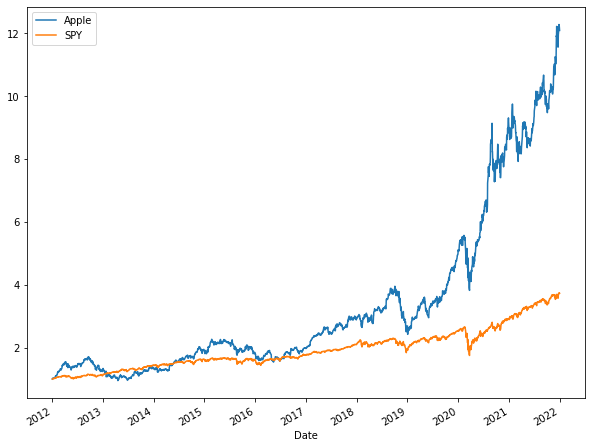

In [7]:
panel_data['Cumu_AAPL'].plot(label = 'Apple', figsize=(10,8))
panel_data['Cumu_SPY'].plot(label = 'SPY')
plt.legend()

In [8]:
panel_data['daily_ret_AAPL'] = panel_data['Close']['AAPL'].pct_change(1)
panel_data['daily_ret_SPY'] = panel_data['Close']['SPY'].pct_change(1)

In [9]:
panel_data

Attributes   Adj Close                   Close                    High  \
Symbols           AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2012-01-03   12.575913  105.276878   14.686786  127.500000   14.732143   
2012-01-04   12.643500  105.442009   14.765714  127.699997   14.810000   
2012-01-05   12.783869  105.722733   14.929643  128.039993   14.948214   
2012-01-06   12.917507  105.450272   15.085714  127.709999   15.098214   
2012-01-09   12.897018  105.706223   15.061786  128.020004   15.276786   
...                ...         ...         ...         ...         ...   
2021-12-27  180.100540  477.260010  180.330002  477.260010  180.419998   
2021-12-28  179.061859  476.869995  179.289993  476.869995  181.330002   
2021-12-29  179.151749  477.480011  179.380005  477.480011  180.630005   
2021-12-30  177.973251  476.160004  178.199997  476.160004  180.570007   
2021-12-31  177.344055  474.959991  177.570007  474.959991  179.229996   

Attributes                     Low                    Open              \
Symbols            SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2012-01-03  128.380005   14.607143  127.430000   14.621429  127.760002   
2012-01-04  127.809998   14.617143  126.709999   14.642857  127.199997   
2012-01-05  128.229996   14.738214  126.430000   14.819643  127.010002   
2012-01-06  128.220001   14.972143  127.290001   14.991786  128.199997   
2012-01-09  128.179993   15.048214  127.410004   15.196429  128.000000   
...                ...         ...         ...         ...         ...   
2021-12-27  477.309998  177.070007  472.010010  177.089996  472.059998   
2021-12-28  478.809998  178.529999  476.059998  180.160004  477.720001   
2021-12-29  478.559998  178.139999  475.920013  179.330002  476.980011   
2021-12-30  479.000000  178.089996  475.670013  179.470001  477.929993   
2021-12-31  476.859985  177.259995  474.670013  178.089996  475.640015   

Attributes       Volume               Cumu_AAPL  Cumu_SPY daily_ret_AAPL  \
Symbols            AAPL          SPY                                       
Date                                                                       
2012-01-03  302220800.0  193697900.0   1.000000  1.000000            NaN   
2012-01-04  260022000.0  127186500.0   1.005374  1.001569       0.005374   
2012-01-05  271269600.0  173895000.0   1.016536  1.004235       0.011102   
2012-01-06  318292800.0  148050000.0   1.027162  1.001647       0.010454   
2012-01-09  394024400.0   99530200.0   1.025533  1.004078      -0.001586   
...                 ...          ...        ...       ...            ...   
2021-12-27   74919600.0   56808600.0  12.278384  3.743216       0.022975   
2021-12-28   79144300.0   47274600.0  12.207572  3.740157      -0.005767   
2021-12-29   62348900.0   54503000.0  12.213701  3.744941       0.000502   
2021-12-30   59773000.0   55329000.0  12.133356  3.734588      -0.006578   
2021-12-31   64062300.0   65237400.0  12.090461  3.725176      -0.003535   

Attributes daily_ret_SPY  
Symbols                   
Date                      
2012-01-03           NaN  
2012-01-04      0.001569  
2012-01-05      0.002662  
2012-01-06     -0.002577  
2012-01-09      0.002427  
...                  ...  
2021-12-27      0.014152  
2021-12-28     -0.000817  
2021-12-29      0.001279  
2021-12-30     -0.002765  
2021-12-31     -0.002520  

[2517 rows x 16 columns]

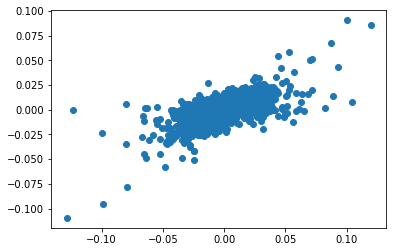

In [10]:
plt.scatter(panel_data['daily_ret_AAPL'],panel_data['daily_ret_SPY'])

In [11]:
LR = stats.linregress(panel_data['daily_ret_AAPL'].iloc[1:],panel_data['daily_ret_SPY'].iloc[1:])
LR

LinregressResult(slope=0.3769130124828362, intercept=0.0001412154029262252, rvalue=0.6607034355567166, pvalue=1.68662628e-315, stderr=0.008540586637572935)

In [12]:
beta,alpha,r_val,p_val,std_err = LR

In [13]:
beta

0.3769130124828362

In [14]:
alpha

0.0001412154029262252

**Taken from :** https://www.learnpythonwithrune.org/calculate-the-capm-with-python-in-3-easy-steps/

In [15]:
adjusted_close = panel_data["Adj Close"]

In [16]:
return_series = ((1 + adjusted_close.pct_change()).cumprod() - 1)

In [17]:
return_series.tail(1)["SPY"][0]

3.5115318659502908

In [18]:
annualized_return = ((1 + return_series.tail(1)["SPY"][0])**(1/10)) - 1
annualized_return

0.16260557966190303

In [19]:
log_returns = np.log(adjusted_close/adjusted_close.shift())
log_returns

Symbols,AAPL,SPY
Date,,
2012-01-03,NaN,NaN
2012-01-04,0.005360,0.001567
2012-01-05,0.011041,0.002659
2012-01-06,0.010399,-0.002580
2012-01-09,-0.001587,0.002424
...,...,...
2021-12-27,0.022715,0.014053
2021-12-28,-0.005784,-0.000818
2021-12-29,0.000502,0.001278


In [20]:
cov = log_returns.cov()
var = log_returns['SPY'].var()
 
beta = cov.loc['AAPL', 'SPY']/var
 
risk_free_return = 0.01
market_return = annualized_return
expected_return = risk_free_return + beta*(market_return - risk_free_return)

In [21]:
expected_return

0.1871495631237288

## Metrics for stock valuation

- i.e. is a value/growth/mix stocks

### Price / Earnings (P/E)
- ratio used to value a company

### Price / Book (P/B)

### Compound Annual Growth Rate (CAGR)

In [ ]:
# reference: https://towardsdatascience.com/python-vs-excel-compound-annual-growth-rate-cagr-c8dbad46d3e0
def cagr(start_value, end_value, num_periods):
    return (end_value / start_value) ** (1 / (num_periods - 1)) - 1

## ESG